2024-07-19 Fiddler
==================
Originally worked out [here](20240719.md).

Let the speed of a solo rider be 1 with power 1.

A rider in a group of $n$ would have power $p$ for $1/n$ of the time and power $p/2$ for $(n-1)/n$ of the time.

In [1]:
%display latex
n, p = var('n p')
p_avg = p/n + p/2*(n-1)/n
solve(p_avg == 1,p)

[p == 2*n/(n + 1)]

So the speed of a group of $n$ is $\frac{2n}{n+1}$.

In [2]:
speed = 2*n/(n+1)

Calculate the distance a solo rider would travel in the time a group of 4 would travel 10km.

In [3]:
t = 10/speed(n=4)
solo_dist = t*speed(n=1)
numerical_approx(solo_dist)

6.25000000000000

The distance the group can make up is

In [4]:
numerical_approx(10-solo_dist)

3.75000000000000

Extra credit
------------
Let $N = 176$ be the size of the peloton and $m$ be the size of the breakaway.

The ratio of the speed of the breakaway to the speed of the peloton is

In [5]:
N = 176
m = var('m')
r = speed(n=m)/speed(n=N-m)
r

(m - 177)*m/((m + 1)*(m - 176))

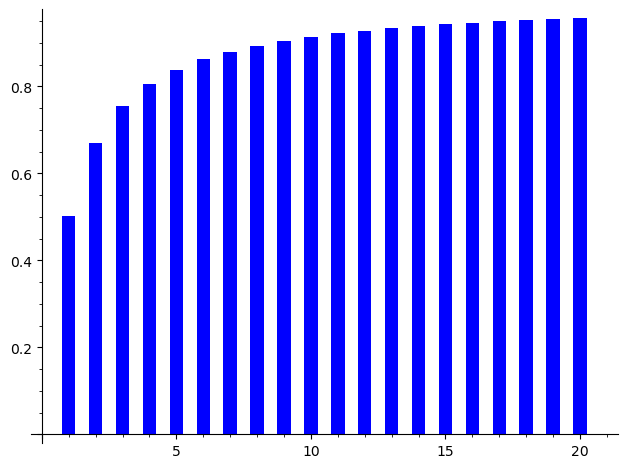

In [6]:
bar_chart([numerical_approx(r(m=i)) for i in range(0,21)])

For the breakaway to succeed, its speed must be at least 10/11 the speed of the peloton

In [7]:
solve(r == 10/11, m)

[m == -1/2*sqrt(31769) + 197/2, m == 1/2*sqrt(31769) + 197/2]

In [8]:
s = solve(r == 10/11, m); [numerical_approx(s[0].rhs()),numerical_approx(s[1].rhs())]

[9.38069793810098, 187.619302061899]

In [9]:
[(i,r(m=i),numerical_approx(r(m=i)) > 10/11) for i in range(8,12)]

[(8, 169/189, False),
 (9, 756/835, False),
 (10, 835/913, True),
 (11, 83/90, True)]

So there must be at least 10 riders in the breakaway for it to succeed.

Making the rounds
-----------------
The sequence of 5s is

In [10]:
i, j = var('i j')
s = sum(5*10^j, j, 0, i-1)
s

5/9*10^i - 5/9

In [11]:
[s(i=i) for i in range(1,10)]

[5, 55, 555, 5555, 55555, 555555, 5555555, 55555555, 555555555]

So the progression is

In [12]:
progression = sin(pi/(180*s))
progression

sin(1/100*pi/(10^i - 1))

In [13]:
[numerical_approx(progression(i=i)) for i in range(5,10)]

[3.14162406983044e-7,
 3.14159579518559e-8,
 3.14159296774909e-9,
 3.14159268500572e-10,
 3.14159265673139e-11]

In [14]:
progression.substitute(10^i==1/x).simplify_full()

-sin(1/100*pi*x/(x - 1))

In [15]:
progression.substitute(10^i==1/x).simplify_full().series(x,4)

(1/100*pi)*x + (1/100*pi)*x^2 + (1/100*pi - 1/6000000*pi^3)*x^3 + Order(x^4)

In [16]:
progression.substitute(10^i==1/x).simplify_full().series(x,4).substitute(x==1/10^i)

1/100*pi/10^i + 1/100*pi/10^(2*i) + 1/6000000*(60000*pi - pi^3)/10^(3*i)

So the $i$th term in the progression is approaches $\pi/10^{i+2}$ for large $i$.